In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 6
%load_ext autoreload
%autoreload 2

In [2]:
#%run autoencoder.py 64 2 0.25 --uneven --model_type gru --sigma 1e-9 --sim_type autoencoder/even/noise0 --embedding 8
%run survey_lcs.py 64 2 0.25

In [3]:
%%time
encode = K.function([model.layers[0].input], [model.layers[2].output])
encoding = encode([X[:10]])[0]

CPU times: user 4.15 s, sys: 2.35 s, total: 6.5 s
Wall time: 2.32 s


In [49]:
len(filenames)

8172

In [29]:
i = -1

In [45]:
pred_i.shape

(1, 4108, 1)

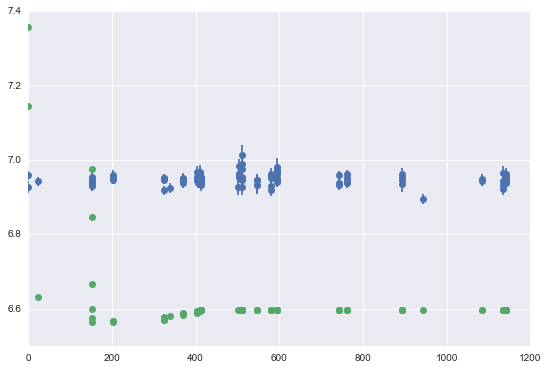

In [48]:
i += 1
# TODO if args.even: ...
inds = (X[i, :, -1] >= 0.)
t = X[i, inds, 0]
m = X[i, inds, 1]
e = X[i, inds, 2]
#plt.plot(t, m, 'o')
plt.errorbar(t, m, e, None, 'o')

pred_i = model.predict({'main_input': X[i:i+1], 'aux_input': X[i:i+1, :, [0, 2]]})
plt.plot(t, pred_i[0, inds, 0], 'o')

#w_r, A_r, phi_r, b_r = pred_gru[i]
#x_r = A_r * np.sin(2 * np.pi * w_r * t + phi_r) + b_r
#plt.plot(t, x_r, '--')

#plt.legend(['Noisy', 'Original'])

In [ ]:
np.corrcoef(encoding, Y[:encoding.shape[0]], rowvar=0)[:6, 6:]

In [ ]:
sns.jointplot(encoding[:, 5], Y[:encoding.shape[0], 0], kind='hex')

In [ ]:
sns.jointplot(encoding[:, 1], Y[:encoding.shape[0], 1], kind='hex')

In [ ]:
sns.jointplot(encoding[:, 5], Y[:encoding.shape[0], 2], kind='hex')

In [ ]:
sns.jointplot(encoding[:, 3], Y[:encoding.shape[0], 3], kind='hex')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

model = RandomForestRegressor(n_estimators=128)
#model = ElasticNet()
#model = SVR(kernel='rbf')

model.fit(encoding, Y[:encoding.shape[0], 0])

In [ ]:
encoding_test = encode([X[test]])[0]
Y_pred = model.predict(encoding_test)

In [ ]:
#sns.jointplot(Y[test, 0], Y_pred[:, 0])
sns.jointplot(Y[test, 0], Y_pred)